# Análise de Dados Aprendizado de Máquina - NBA
## Informações do Aluno:

* Nome: Gabriel Castelo Branco Rocha Alencar Pinto
* Matrícula: 2020006523


## Descrição do Trabalho

O trabalho prático 2 da disciplina de Introdução à Inteligência Artificial tem como objetivo o desenvolvimento de algoritmos de aprendizado de máquina para previsão do tempo de permanência de um atleta na liga principal de basquete americana, a NBA, por mais de 5 anos, e também do agrupamento dos dados dos atletas em clusters.

Para cada uma das demandas, uma técnica diferente de aprendizado de máquina foi aplicada. Foram elas:

1. Aprendizado supervisionado: Algoritmo KNN (_K Nearest Neightbours_)
2. Aprendizado não supervisionado: Algoritmo _K-means_

Os algoritmos foram implementados como módulso python, e estão contidos na subpasta _modules_, contida neste diretório. Cada algoritmo está documentado corretamete adiante, com breve explicação sobre seu funcionamento em suas respectivas sessões.

In [15]:
# Imports e Pré definiçao
# Importação e configuração inicial de Módulos

import pandas as pd
import matplotlib.pyplot as plt
import modules.supervisioned as sup
import modules.unsupervisioned as uns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np

plt.style.use("seaborn")

plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4


def despine(ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

/tmp/ipykernel_558/3707603039.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Aprendizado supervisionado

No aprendizado supervisionado, é utilizada a técnica KNN (_K Nearest Neightbours_). O algoritmo KNN consiste em, baseado na distância euclidiana, buscar os K vizinhos mais próximos de um determinado ponto e, com base na classificação da maioria dentre esses K vizinhos, decidir qual a classificação desse ponto.

Os valores de K utilizados para o treinamento do algoritmo foram: 2, 10, 25 e 50.

In [3]:
# Leitura de Dados do 

df_treino = pd.read_csv("./data/nba_treino.csv")
df_teste = pd.read_csv("./data/nba_teste.csv")

df_treino['TARGET_5Yrs'] = df_treino["TARGET_5Yrs"].astype(bool)
df_teste['TARGET_5Yrs'] = df_teste["TARGET_5Yrs"].astype(bool)

In [4]:
classifier2 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 2)
classifier2.train()

classifier10 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 10)
classifier10.train()

classifier25 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 25)
classifier25.train()

classifier50 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 50)
classifier50.train()

In [5]:
classifs = [classifier2, classifier10, classifier25, classifier50]
a = []

for i in classifs:
    a.append(i.predict(df_teste))

### Demonstração de resultados e comparação com SKlearn

Para avaliação do desempenho do algoritmo, foram utilizadas as métricas:

* Acurácia
* Revocação
* Precisão
* Medida F1

Além disso, os resultados foram comparados ao desempenho do algoritmo SKLearn, para validação da precisão dos dados.

Na comparação, é possível perceber para os valores de K 2, 10 e 50 que há uma ligeira discrepância entre os valores fornecidos pela biblioteca SKlearn e os Valores obtidos pelo algoritmo escrito por mim.
Tais diferenças podem ser justificadas por conta de tratamento dado para os dados pela biblioteca scikit-learn, que não foi feito da mesma maneira neste trabalho. Todavia, os resultados são bem próximos em termos de eficiência.


In [6]:
X_train = df_treino.drop('TARGET_5Yrs', axis=1)
Y_train = df_treino['TARGET_5Yrs']

X_test = df_teste.drop('TARGET_5Yrs', axis=1)
Y_test = df_teste['TARGET_5Yrs']

sk2 = KNeighborsClassifier(2)
sk10 = KNeighborsClassifier(10)
sk25 = KNeighborsClassifier(25)
sk50 = KNeighborsClassifier(50)

k_class = [sk2, sk10, sk25, sk50]
K_predict = []

for i in k_class:
    i.fit(X_train, Y_train)
    K_predict.append(i.predict(X_test))    


In [16]:
for (idx, i), j in zip(enumerate(classifs), K_predict):
    i.results(a[idx])
    print(f"| MÉTRICAS SKLEARN |")
    print(f"""
          Acurácia: {accuracy_score(Y_test, j) * 100 :.2f}%\n
          Recall: {recall_score(Y_test, j) * 100 :.2f}% \n
          Precisão: {precision_score(Y_test, j)  * 100 :.2f}% \n
          F1-Score: {f1_score(Y_test, j) * 100 :.2f}% \n
          | Matrix de confusão SKLearn | \n
          {confusion_matrix(Y_test, j)}\n
          """)

| Relatório de algoritmo KNN, K = 2 |
| MATRIZ DE CONFUSÃO |
 
              ------------------ 
 
              |  141  |  27  |
 
              -------------------
 
              |  76  |  24  |
 
              -------------------

| MÉTRICAS |
 
              -> Acurácia: 61.57
 
              -> Recall: 83.93 
 
              -> Precisão: 64.98 
 
              -> Medida F1: 73.25
| MÉTRICAS SKLEARN |

          Acurácia: 55.22%

          Recall: 44.64% 

          Precisão: 73.53% 

          F1-Score: 55.56% 

          | Matrix de confusão SKLearn | 

          [[73 27]
 [93 75]]

          
| Relatório de algoritmo KNN, K = 10 |
| MATRIZ DE CONFUSÃO |
 
              ------------------ 
 
              |  132  |  36  |
 
              -------------------
 
              |  55  |  45  |
 
              -------------------

| MÉTRICAS |
 
              -> Acurácia: 66.04
 
              -> Recall: 78.57 
 
              -> Precisão: 70.59 
 
              -> Medida F1: 74.37
| 

## Aprendizado Não Supervisionado

Ao contrário do algortimo KNN, que busca _rotular_ um conjunto de dados, o algoritmo K-means busca realizar um agrupamento.

A ideia é verificar a existência de K grupos dentro de um conjunto de dados, sem dizer explicitamente o que cada um desses grupos é, mas tendo a noção de agrupamento.


In [8]:
# Para simular a ausência de um rótulo, removemos a coluna de Target.

df_treino = pd.read_csv('./data/nba_treino.csv')
df_treino.drop('TARGET_5Yrs', axis=1, inplace=True)

In [9]:
grouper2 = uns.KMeansClassifier(df_treino, 2)

grouper2.train()

Algoritmo centrado para K = 2
Grupo 0: 486 pontos
Grupo 1: 586 pontos
Centroide do Grupo 0: GP        44.224280
MIN       11.928601
PTS        4.151440
FGM        1.607613
FGA        3.749588
FG%       42.711317
3PMade     0.159671
3PA        0.535802
3P%       16.064609
FTM        0.780041
FTA        1.148560
FT%       67.552675
OREB       0.708230
DREB       1.351852
REB        2.059671
AST        0.899588
STL        0.403086
BLK        0.250000
TOV        0.775309
Name: 0, dtype: float64
Centroide do Grupo 1: GP        73.552901
MIN       22.579352
PTS        9.165358
FGM        3.539078
FGA        7.787543
FG%       45.373208
3PMade     0.334642
3PA        1.015358
3P%       22.015529
FTM        1.754949
FTA        2.413140
FT%       72.887201
OREB       1.274403
DREB       2.648805
REB        3.923038
AST        2.069625
STL        0.798464
BLK        0.472014
TOV        1.547782
Name: 2, dtype: float64


In [10]:
grouper3 = uns.KMeansClassifier(df_treino, 3)

grouper3.train()

Algoritmo centrado para K = 3
Grupo 0: 403 pontos
Grupo 1: 377 pontos
Grupo 2: 292 pontos
Centroide do Grupo 0: GP        73.516129
MIN       23.114144
PTS        9.489578
FGM        3.631514
FGA        8.238958
FG%       43.759801
3PMade     0.474194
3PA        1.419107
3P%       30.793300
FTM        1.758313
FTA        2.335732
FT%       75.113896
OREB       1.053598
DREB       2.417370
REB        3.469231
AST        2.408685
STL        0.857320
BLK        0.366749
TOV        1.596278
Name: 14, dtype: float64
Centroide do Grupo 1: GP        61.851459
MIN       16.169496
PTS        6.130504
FGM        2.433422
FGA        5.019363
FG%       47.914854
3PMade     0.000796
3PA        0.049602
3P%        1.046154
FTM        1.260743
FTA        1.901857
FT%       65.887798
OREB       1.353846
DREB       2.357560
REB        3.714854
AST        0.937135
STL        0.492573
BLK        0.533952
TOV        1.072414
Name: 18, dtype: float64
Centroide do Grupo 2: GP        39.897260
MIN       12.3

### Demonstração de Resultados:

No caso do Algoritmo K-means, a demonstração de resultados para ambos os valores de K, 2 e 3, foi feita por meio da plotagem dos gráficos com base nos atributos GP e MIN, que permitem uma boa visualização da separação nos dados, no caso de K = 2, e demonstram que, com 3 grupos, começa a haver um overfitting de dados, gerando confusão entre os clusters.

Em vermelho, no formato de X, foram plotados os centróides calculados pelo algoritmo do trabalho.

Além disso, foi utilizada para modos de comparação a biblioteca scikit-learn, com seu algoritmo k-means próprio. Fica evidente, em ambos os K's, 2 e 3, como as classificações do algoritmo implementado para o trabalho funcionou de maneira idêntica ao da biblioteca, permitindo assim concluir que o algoritmo funciona de maneira correta.

In [11]:
kmeans2 = KMeans(n_clusters=2)
kmeans3 = KMeans(n_clusters=3)

clusters2 = kmeans2.fit_predict(df_treino)
clusters3 = kmeans3.fit_predict(df_treino)

/home/gcastelo/faculdade/TP2_IA/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gcastelo/faculdade/TP2_IA/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


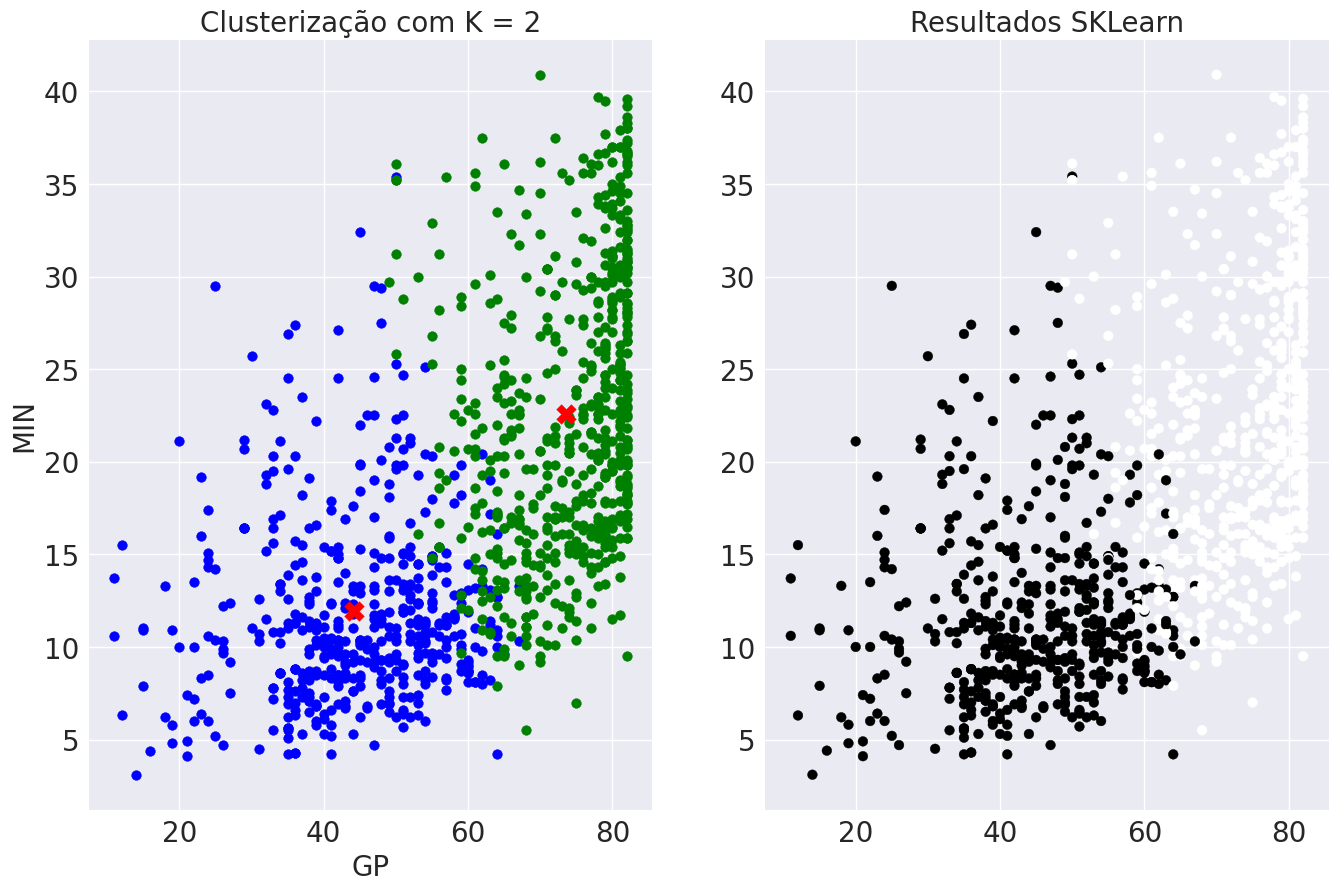

In [12]:
gps = grouper2.get_groups()
ctrs = grouper2.get_centroids()

g1 = gps[0]
g2 = gps[1]


aux = []
aux2 = []

atr1 = "GP"
atr2 = "MIN"

for i in g1:
    aux.append(i.get_attrs_as_list([atr1, atr2]))

for i in g2:
    aux2.append(i.get_attrs_as_list([atr1, atr2]))
    

aux = np.array(aux)
aux2 = np.array(aux2)

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Clusterização com K = 2")
ax[0].set_xlabel(atr1)
ax[0].set_ylabel(atr2)

ax[0].scatter(aux[:, 0], aux[:, 1], c="blue")
ax[0].scatter(aux2[:, 0], aux2[:, 1], c="green")

for ix, i in enumerate(ctrs):
    ax[0].scatter(i.get_attrs_as_list([atr1, atr2])[0], i.get_attrs_as_list([atr1, atr2])[1], marker="X", c='red', s=200)
    

ax[1].set_title("Resultados SKLearn")

ax[1].scatter(df_treino[atr1], df_treino[atr2], c=clusters2)

fig.show()

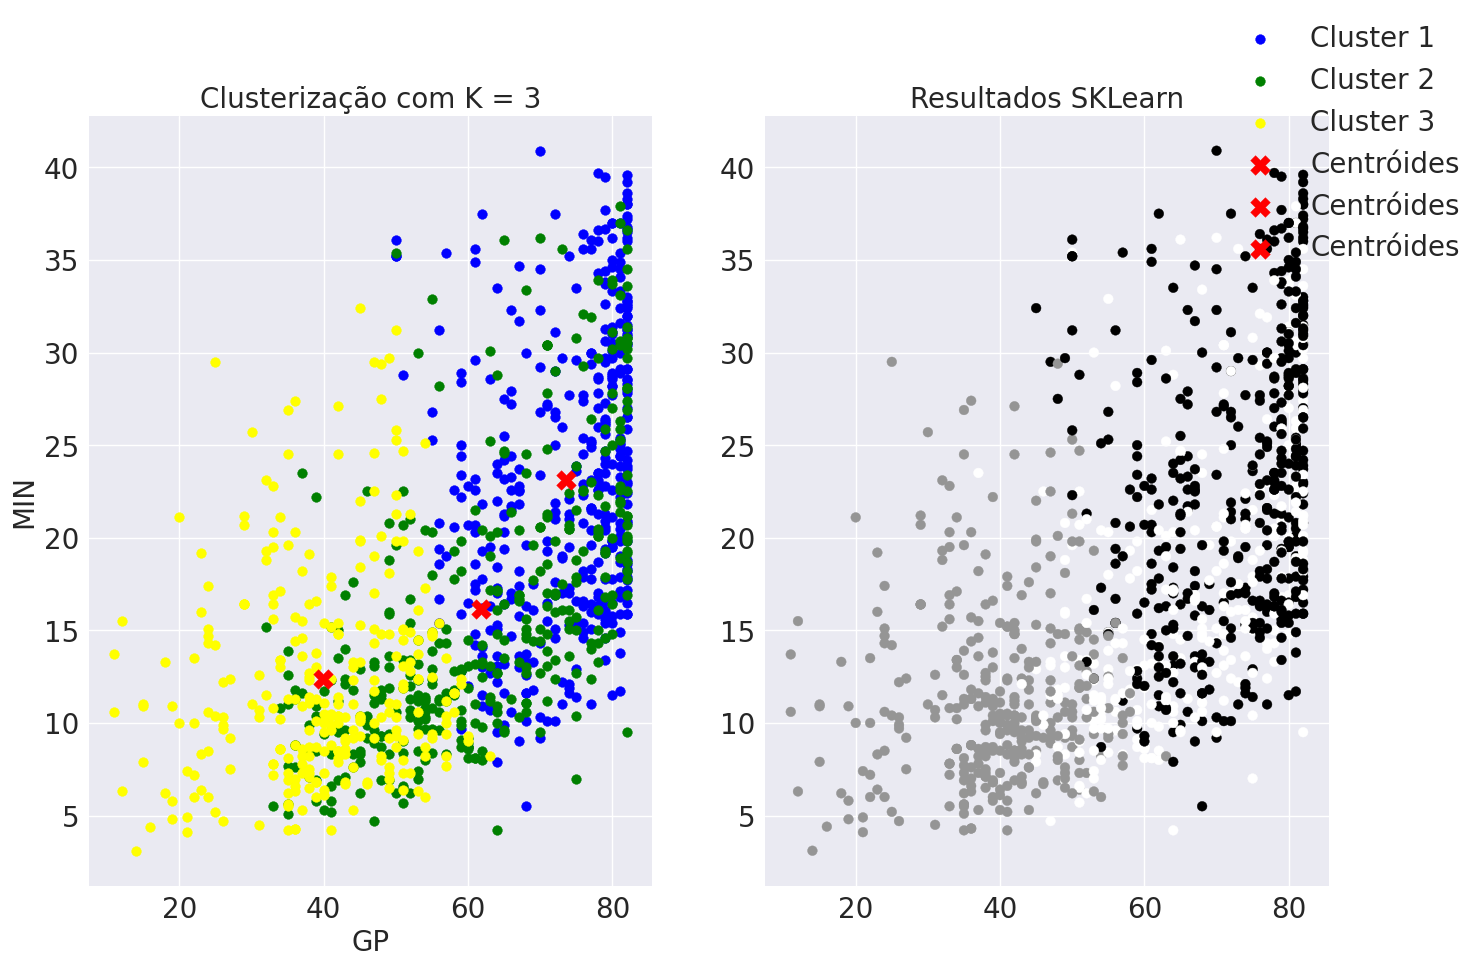

In [18]:
gps = grouper3.get_groups()
ctrs = grouper3.get_centroids()

g1 = gps[0]
g2 = gps[1]
g3 = gps[2]

aux = []
aux2 = []
aux3 = []

atr1 = "GP"
atr2 = "MIN"

for i in g1:
    aux.append(i.get_attrs_as_list([atr1, atr2]))

for i in g2:
    aux2.append(i.get_attrs_as_list([atr1, atr2]))
    
for i in g3:
    aux3.append(i.get_attrs_as_list([atr1, atr2]))
    

aux = np.array(aux)
aux2 = np.array(aux2)
aux3 = np.array(aux3)

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Clusterização com K = 3")
ax[0].set_xlabel(atr1)
ax[0].set_ylabel(atr2)

ax[0].scatter(aux[:, 0], aux[:, 1], c="blue")
ax[0].scatter(aux2[:, 0], aux2[:, 1], c="green")
ax[0].scatter(aux3[:, 0], aux3[:, 1], c="yellow")

for i in ctrs:
    ax[0].scatter(i.get_attrs_as_list([atr1, atr2])[0], i.get_attrs_as_list([atr1, atr2])[1], marker="X", c='red', s=200)
    
ax[1].set_title("Resultados SKLearn")
ax[1].scatter(df_treino[atr1], df_treino[atr2], c=clusters3)


fig.show()